## Image segmentation with CamVid

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
# # from sklearn.cluster import KMeans
# import kaggle
# !kaggle competitions download tgs-salt-identification-challenge



In [4]:
# import zipfile
# zip_ref = zipfile.ZipFile('/home/ubuntu/fastai-courses/course-v3/nbs/dl1/train.zip', 'r')
# zip_ref.extractall('/home/ubuntu/.fastai/data/salt/train')
# zip_ref.close()

# Try regular thresholding around mean

In [5]:
# os.listdir('/home/ubuntu/.fastai/data/salt/images/')

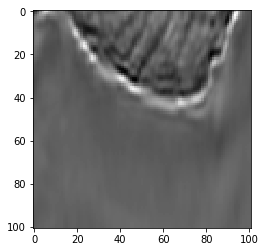

In [47]:
e=i=plt.imread('/home/ubuntu/.fastai/data/salt/train/images/b172bd2032.png')
plt.imshow(e)
plt.show()


In [48]:

flat=e[:,:,0].flatten()
mean=np.mean(flat)

flat[flat<mean]=0
flat[flat>mean]=1
print(mean)

0.37688923


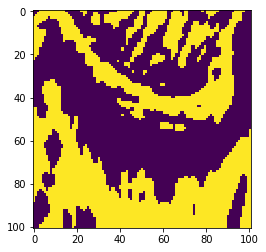

In [49]:
np.shape(flat)
done=np.reshape(flat,[101,101])

plt.imshow(done)
plt.show()

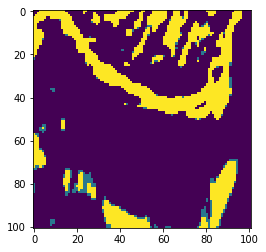

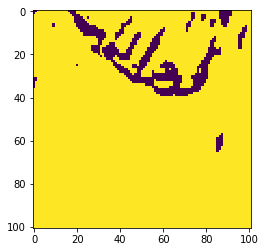

In [50]:
g=np.copy(e[:,:,0])
g[g>0.4]=1
g[g<0.4]=0

plt.imshow(g)
plt.show()
g

g=np.copy(e[:,:,0])
g[g>0.3]=1
g[g<0.3]=0

plt.imshow(g)
plt.show()

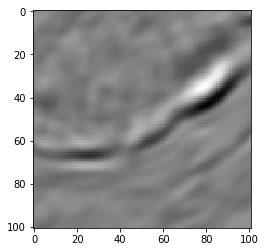

In [51]:
e=i=plt.imread('/home/ubuntu/.fastai/data/salt/train/images/7d5c34a95a.png')
plt.imshow(e)
plt.show()


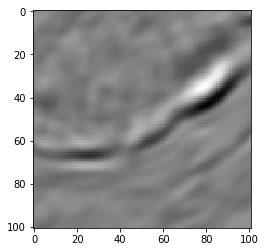

In [52]:
mask=i=plt.imread('/home/ubuntu/.fastai/data/salt/train/masks/7d5c34a95a.png')
plt.imshow(e)
plt.show()

In [53]:
ones=mask==1

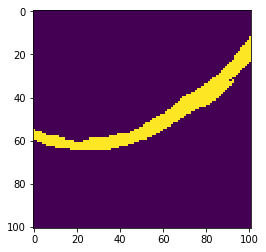

In [54]:
orig=np.copy(e[:,:,0])
orig[ones]=1
orig[np.invert(ones)]=0

plt.imshow(orig)
plt.show()

In [55]:
orig=np.copy(e[:,:,0])
print(np.mean(orig[ones]))
print(np.min(orig[ones]))
print(np.max(orig[ones]))

0.5343216
0.0
1.0


In [13]:
# img = cv2.imread('/home/ubuntu/.fastai/data/salt/train/images/7d5c34a95a.png',0)

# # create a mask
# mask = ones
# masked_img = cv2.bitwise_and(img,img,mask = mask)

# # Calculate histogram with mask and without mask
# # Check third argument for mask
# hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
# hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

# plt.subplot(221), plt.imshow(img, 'gray')
# plt.subplot(222), plt.imshow(mask,'gray')
# plt.subplot(223), plt.imshow(masked_img, 'gray')
# plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
# plt.xlim([0,256])

# plt.show()

In [14]:
import os
print(os.getcwd())
path='/home/ubuntu/fastai-courses/course-v3/nbs/dl1/data/salt'

# !kaggle competitions download -c tgs-salt-identification-challenge

/home/ubuntu/fastai-courses/course-v3/nbs/dl1


In [15]:
# import zipfile
# zip_ref = zipfile.ZipFile('/home/ubuntu/fastai-courses/course-v3/nbs/dl1/salt/test.zip', 'r')
# zip_ref.extractall('/home/ubuntu/fastai-courses/course-v3/nbs/dl1/salt/test')
# zip_ref.close()

In [16]:
path = Config.data_path()/'salt'
path.mkdir(exist_ok=True)
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/salt/train')]

In [17]:

path_lbl = path/'train/masks'
path_img = path/'train/images'

## Data

In [18]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/home/ubuntu/.fastai/data/salt/train/images/cb4f7abe67.png'),
 PosixPath('/home/ubuntu/.fastai/data/salt/train/images/fdc06fea10.png'),
 PosixPath('/home/ubuntu/.fastai/data/salt/train/images/86c675c4fb.png')]

In [19]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/home/ubuntu/.fastai/data/salt/train/masks/cb4f7abe67.png'),
 PosixPath('/home/ubuntu/.fastai/data/salt/train/masks/fdc06fea10.png'),
 PosixPath('/home/ubuntu/.fastai/data/salt/train/masks/86c675c4fb.png')]

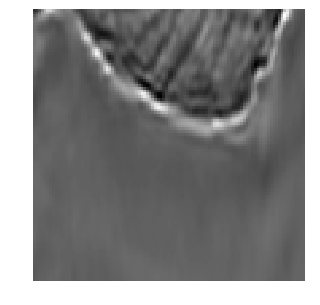

In [20]:
img_f = fnames[9]
img = open_image(img_f)
img.show(figsize=(5,5))

# print(img_f,get_y_fn(img_f))

In [22]:
get_y_fn = lambda x: path_lbl/f'{x.stem}{x.suffix}' # converts from image to mask file name
                                                       

(101, 101, 3)


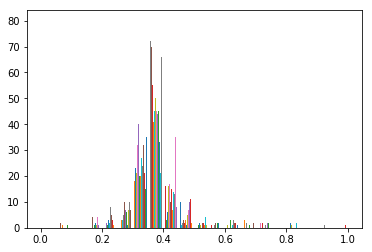

(([array([ 0.,  0.,  0.,  1.,  0.,  6., 18., 34., 32., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
   array([ 0.,  0.,  0.,  0.,  1.,  2., 18., 44., 28.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
   array([ 0.,  0.,  0.,  0.,  0.,  0., 16., 55., 20.,  8.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
   array([ 0.,  0.,  0.,  0.,  0.,  0., 17., 61., 16.,  3.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
   array([ 0.,  0.,  0.,  0.,  0.,  0., 17., 63., 17.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.]),
   array([ 0.,  0.,  0.,  0.,  0.,  0., 19., 70.,  8.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.]),
   array([ 0.,  0.,  0.,  0.,  0.,  0., 24., 74.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.]),
   array([ 0.,  0.,  0.,  0.,  0.,  0., 26., 72.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]),
   array([ 0.,  0.,  0.,  0.,  0.,  0., 25., 68.,  5.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,

In [13]:
#frequency in an image
print(np.shape(e))
plt.hist(e[:,:,2],bins=20),plt.show()

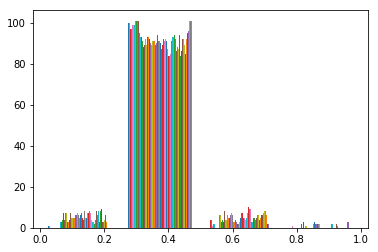

(([array([  1., 100.,   0.,   0.]),
   array([  1., 100.,   0.,   0.]),
   array([ 0., 99.,  2.,  0.]),
   array([ 0., 97.,  4.,  0.]),
   array([ 0., 97.,  4.,  0.]),
   array([ 0., 98.,  2.,  1.]),
   array([ 0., 99.,  1.,  1.]),
   array([ 0., 99.,  2.,  0.]),
   array([ 0., 99.,  2.,  0.]),
   array([ 0., 99.,  2.,  0.]),
   array([ 0., 99.,  2.,  0.]),
   array([  0., 101.,   0.,   0.]),
   array([  0., 101.,   0.,   0.]),
   array([  0., 101.,   0.,   0.]),
   array([  0., 101.,   0.,   0.]),
   array([  0., 101.,   0.,   0.]),
   array([ 0., 97.,  4.,  0.]),
   array([ 0., 95.,  6.,  0.]),
   array([ 2., 93.,  6.,  0.]),
   array([ 3., 93.,  2.,  3.]),
   array([ 3., 93.,  3.,  2.]),
   array([ 4., 89.,  8.,  0.]),
   array([ 4., 91.,  4.,  2.]),
   array([ 7., 88.,  3.,  3.]),
   array([ 6., 89.,  3.,  3.]),
   array([ 4., 89.,  8.,  0.]),
   array([ 4., 92.,  4.,  1.]),
   array([ 7., 89.,  2.,  3.]),
   array([ 7., 89.,  4.,  1.]),
   array([ 6., 89.,  6.,  0.]),
   array([ 3

In [15]:
plt.hist(e[:,:,2],bins=4),plt.show()

In [12]:
# import numpy as np
# import cv2

# img = cv2.imread('/home/ubuntu/.fastai/data/salt/train/images/b172bd2032.png')
# Z = img.reshape((-1,3))

# # convert to np.float32
# Z = np.float32(Z)

# # define criteria, number of clusters(K) and apply kmeans()
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# K = 8
# ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# # Now convert back into uint8, and make original image
# center = np.uint8(center)
# res = center[label.flatten()]
# res2 = res.reshape((img.shape))

# cv2.imshow('res2',res2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

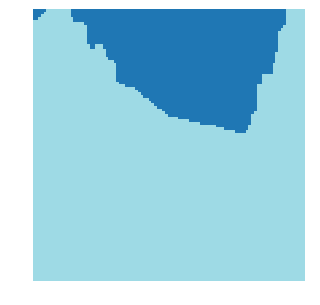

In [23]:
mask = open_mask(get_y_fn(img_f)) # fastai shows masks with distinct colors 
# or open_mask(get_y_fn(img_f))  # mask reads file as (bs,x,y) so bs=1 here
# mask also assigns ints to floats >

#Return ImageSegment object create from mask in file fn. If div, divides pixel values by 255.
mask.show(figsize=(5,5), alpha=1)

In [ ]:
path_img

In [ ]:
print(np.shape(mask))



In [24]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([101, 101]), tensor([[[  0,   0,   0,  ..., 255, 255, 255],
          [  0,   0,   0,  ..., 255, 255, 255],
          [  0,   0,   0,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]]]))

In [25]:

# codes = np.loadtxt(path/'codes.txt', dtype=str); codes

# df=pd.read_csv('/home/ubuntu/.fastai/data/salt/train.csv')
# df.head()
ImageFileList??

Object `ImageFileList` not found.


## Datasets

In [38]:
size = src_size# do 1/2 image size
bs=8
codes=array(['salt', 'sediment'], dtype='<U17')

In [39]:
src = (SegmentationItemList.from_folder(path_img, div=True)
    .random_split_by_pct()
    .label_from_func(get_y_fn, classes=codes))

# changes open_mask for target value

src.train.y.create_func = partial(open_mask, div=True)
src.valid.y.create_func = partial(open_mask, div=True)
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [40]:
# data = (SegmentationItemList.from_folder(path_img,div=True) 
#         .random_split_by_pct()
#         .label_from_func(get_y_fn, classes=codes,div=True) #This method is primarly intended for inputs that are filenames, but could work in other settings.
#         .transform(get_transforms(), tfm_y=True, size=128)
#         .databunch())
# data.show_batch(rows=2, figsize=(7,5))
# # list of file names in text file
# # as they are from video, dont want very close frames in val otherwise it is not wide enough for evaluation in camvid


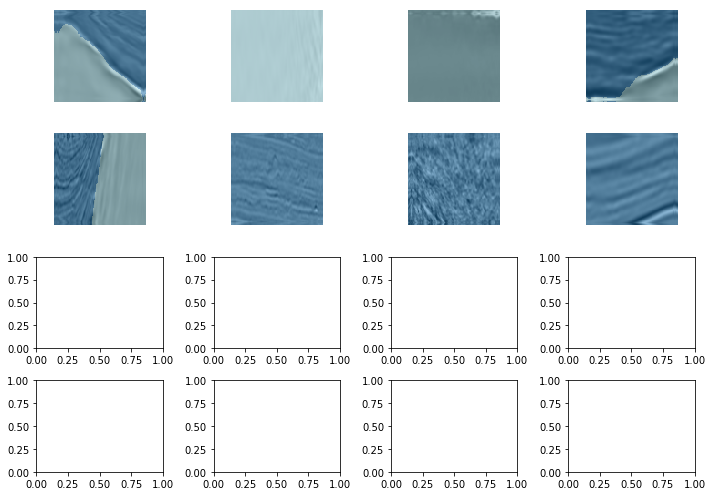

In [41]:
data.show_batch(4, figsize=(10,7)) # automtic over lays img with mask 

## Model

In [32]:
# name2id = {v:k for k,v in enumerate(codes)}
# void_code = name2id['Void']
# Dont want to consider label void
def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target  # get boolean array of not void/void
    return (input.argmax(dim=1)==target).float().mean() # only consider pixels that are not void
metrics=acc_camvid


In [33]:

def dice(input, target):
    smooth=.001
    
    input=input[:,1,:,:].contiguous().view(-1).float().cuda()
    
    target=target.view(-1).float().cuda()

    
    return(1-2*(input*target).sum()/(input.sum()+target.sum()+smooth))
    

In [42]:
# learn = Learner.create_unet(data, models.resnet34, metrics=metrics)

In [43]:
learn = Learner.create_unet(data, models.resnet34, metrics=dice) #.to_fp16() # mixed precision training, much faster
                                                                            # cuts unnecessary floats

In [1]:
# learn.lr_find()

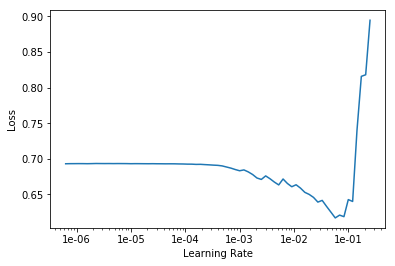

In [26]:
# lr_find(learn)
learn.recorder.plot()

In [64]:
lr=1e-2

In [65]:
learn.fit_one_cycle(10, slice(lr))

Total time: 05:20
epoch  train_loss  valid_loss  dice          
1      0.368198    0.310961    1.216494        (00:31)
2      0.387139    0.384713    0.904862        (00:31)
3      0.359458    1.405502    2.049970        (00:31)
4      0.340916    0.554736    5.166428        (00:32)
5      0.306130    39.275780   0.649872        (00:32)
6      0.335479    159591.625000  0.628183     (00:32)
7      0.286637    23164.687500  1.285248      (00:32)
8      0.296794    14754392.000000  -9.274956  (00:32)
9      0.258315    119363840.000000  2.098093  (00:32)
10     0.261325    123035760.000000  1.448979  (00:32)



In [66]:
learn.save('stage-1')

In [67]:
learn.load('stage-1');

In [68]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


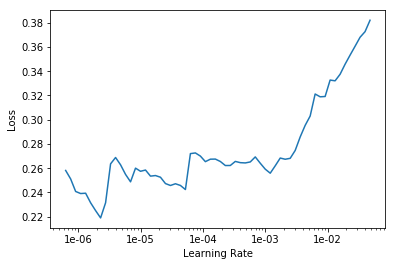

In [69]:
lr_find(learn)
learn.recorder.plot()

In [70]:
lrs = slice(5e-5,3e-4)

In [71]:
learn.fit_one_cycle(5, lrs)

Total time: 03:23
epoch  train_loss  valid_loss  dice           
1      0.243488    1180702976.000000  0.841800  (00:40)
2      0.275827    1636529280.000000  1.039039  (00:40)
3      0.275078    1235684480.000000  1.230172  (00:40)
4      0.250813    1895895.500000  1.327757     (00:40)
5      0.269555    67984.007812  1.207752       (00:40)



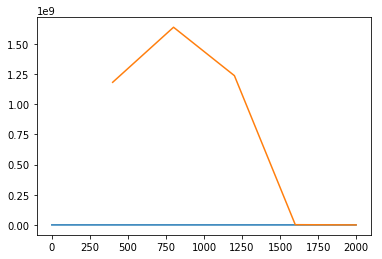

In [72]:
learn.recorder.plot_losses()

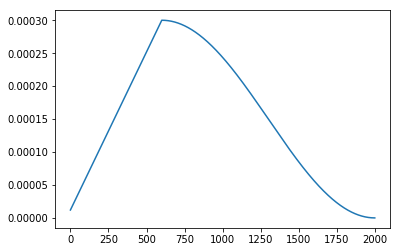

In [73]:
learn.recorder.plot_lr()

In [74]:
learn.save('stage-2');

## Go big

You may have to restart your kernel and come back to this stage if you run out of memory, and may also need to decrease `bs`.

In [102]:
size = src_size//2 # do 1/2 image size
bs=8

In [103]:
src = (SegmentationItemList.from_folder(path_img, div=True)
    .random_split_by_pct()
    .label_from_func(get_y_fn, classes=codes))

# changes open_mask for target value

src.train.y.create_func = partial(open_mask, div=True)
src.valid.y.create_func = partial(open_mask, div=True)
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [104]:
learn = Learner.create_unet(data, models.resnet34, metrics=metrics)

In [105]:
learn.load('stage-2'); 

In [106]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


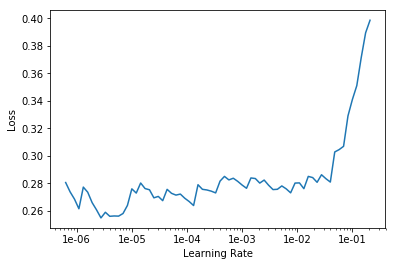

In [107]:
learn.recorder.plot()

In [ ]:
lr=1e-3

In [ ]:
learn.fit_one_cycle(10, slice(lr))

Total time: 08:44
epoch  train_loss  valid_loss  acc_camvid
1      0.454597    0.349557    0.900428    (01:02)
2      0.418897    0.351502    0.897495    (00:51)
3      0.402104    0.330255    0.906775    (00:50)
4      0.385497    0.313330    0.911832    (00:51)
5      0.359252    0.297264    0.916108    (00:52)
6      0.335910    0.297875    0.917553    (00:50)
7      0.336133    0.305602    0.913439    (00:51)
8      0.321016    0.305374    0.914063    (00:51)
9      0.311554    0.299226    0.915997    (00:51)
10     0.308389    0.301060    0.915253    (00:51)



In [ ]:
learn.save('stage-1-big')

In [ ]:
learn.load('stage-1-big');

In [ ]:
learn.unfreeze()

In [ ]:
lrs = slice(1e-6,lr)

In [ ]:
learn.fit_one_cycle(10, lrs, wd=1e-3)

Total time: 09:30
epoch  train_loss  valid_loss  acc_camvid
1      0.323283    0.300749    0.915948    (00:56)
2      0.329482    0.290447    0.918337    (00:56)
3      0.324378    0.298494    0.920271    (00:57)
4      0.316414    0.296469    0.918053    (00:56)
5      0.305226    0.284694    0.920893    (00:57)
6      0.301774    0.306676    0.914202    (00:57)
7      0.279722    0.285487    0.919991    (00:57)
8      0.269306    0.285219    0.920963    (00:57)
9      0.260325    0.284758    0.922026    (00:57)
10     0.251017    0.285375    0.921562    (00:57)



In [ ]:
learn.save('stage-2-big')

In [ ]:
learn.load('stage-2-big')

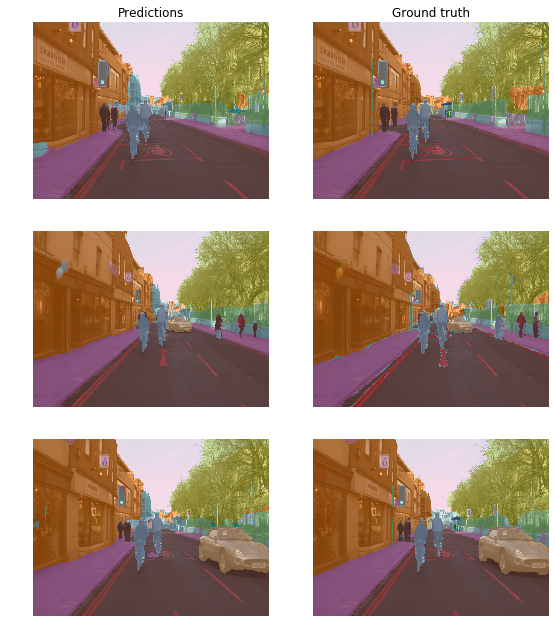

In [ ]:
learn.show_results()